In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('income.csv')

In [3]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


# Plotting Age Vs Income

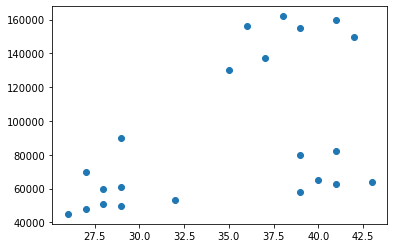

In [4]:
plt.scatter(df.Age,df['Income($)'])

# K Means clustering algorithm

In [5]:
from sklearn.cluster import KMeans

In [7]:
km=KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [9]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [10]:
df['Cluster']=y_predicted

In [11]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


In [13]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

No handles with labels found to put in legend.


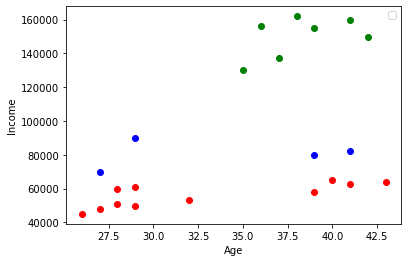

In [17]:
plt.scatter(df0['Age'],df0['Income($)'],color='green')
plt.scatter(df1['Age'],df1['Income($)'],color='blue')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend() 

# scaling is not correct. We need to scale our features using min max scaler

# Min Max scaler

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [48]:
scaler.fit(df[['Income($)']])

MinMaxScaler()

In [49]:
df['Income($)']=scaler.transform(df[['Income($)']]) # incomes are in the range of 0-1

In [51]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


In [52]:
scaler.fit(df[['Age']])

MinMaxScaler()

In [53]:
df['Age']=scaler.transform(df[['Age']])

In [54]:
df.head()

,Name,Age,Income($),Cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


# K Means Algorithm to train the scaled dataset

In [55]:
from sklearn.cluster import KMeans

In [56]:
km=KMeans(n_clusters=3)

In [58]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [62]:
df['Cluster']=y_predicted

In [63]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

In [64]:
df2.head()

,Name,Age,Income($),Cluster
16,Dipika,0.823529,0.170940,2
17,Priyanka,0.882353,0.153846,2
18,Nick,1.000000,0.162393,2
19,Alia,0.764706,0.299145,2
20,Sid,0.882353,0.316239,2


In [67]:
km.cluster_centers_ # these are centroids

array([[0.72268908, 0.8974359 ],
       [0.1372549 , 0.11633428],
       [0.85294118, 0.2022792 ]])

Text(0, 0.5, 'Income')

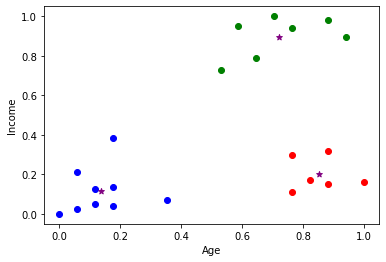

In [69]:
df0=df[df.Cluster==0]
df1=df[df.Cluster==1]
df2=df[df.Cluster==2]

plt.scatter(df0['Age'],df0['Income($)'],color='green')
plt.scatter(df1['Age'],df1['Income($)'],color='blue')
plt.scatter(df2['Age'],df2['Income($)'],color='red')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*')
plt.xlabel('Age')
plt.ylabel('Income')


In [71]:
krng=range(1,10)
sse=[]
for k in krng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_) #inertia calculates the SSE 

C:\Users\kcjc608\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [72]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.26217927623452125,
 0.22443334487241418,
 0.16858512236029757,
 0.13265419827245162,
 0.10740235405674733]

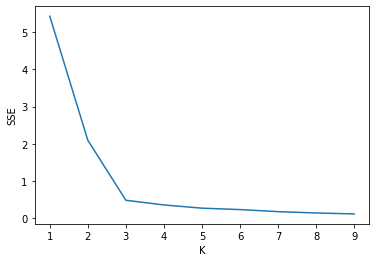

In [74]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(krng,sse)

In [ ]:
# k=3